In [1]:
import numpy as np
import sympy as s
import pandas as pd
import matplotlib.pyplot as plt
from ebola_2 import ebola2
import distancia
from importlib import reload
from distancia import distancia as d

In [2]:
ls ..

Data/  Ebola2/  Ebola3/  Fent els gràfics.ipynb*  finals.csv*  README.md*


In [3]:
dades = [pd.read_csv("../Data/"+str(i)+"Cart.csv") for i in range(1,5)]

In [4]:
def dq(a,b):
    a1 = a['x'].as_matrix()
    a2 = a['y'].as_matrix()
    b1 = b['x'].as_matrix()
    b2 = b['y'].as_matrix()
    return np.linalg.norm(a1-b1)**2 + np.linalg.norm(a2-b2)**2

In [5]:
d1 = dades[0]
x01 = d1["x"][175]
y01 = d1["y"][175]
vx01 = d1["vx"][175]
vy01 = d1["vy"][175]
d2 = dades[1]
x02 = d2["x"][270]
y02 = d2["y"][270]
vx02 = d2["vx"][270]
vy02 = d2["vy"][270]
d3 = dades[2]
x03 = d3["x"][100]
y03 = d3["y"][100]
vx03 = d3["vx"][100]
vy03 = d3["vy"][100]
d4 = dades[3]
x04 = d4["x"][100]
y04 = d4["y"][100]
vx04 = d4["vx"][100]
vy04 = d4["vy"][100]
d1p = dades[0].iloc[175:838]
d2p = dades[1].iloc[270:1158]
d3p = dades[2].iloc[100:1063]
d4p = dades[3].iloc[100:429]
def nova_fitness(v):
    [c,k,sigma,mu] = v
    ebolaa = ebola2(c, k, sigma, mu, len(d1p), 1/180,x01,y01,vx01,vy01,"dummy",False)[['x','y']]
    ebolab = ebola2(c, k, sigma, mu, len(d2p), 1/180,x02,y02,vx02,vy02,"dummy",False)[['x','y']]
    ebolac = ebola2(c, k, sigma, mu, len(d3p), 1/180,x03,y03,vx03,vy03,"dummy",False)[['x','y']]
    ebolad = ebola2(c, k, sigma, mu, len(d4p), 1/180,x04,y04,vx04,vy04,"dummy",False)[['x','y']]
    return 0.25*(dq(ebolaa, d1p)+dq(ebolab,d2p)+dq(ebolac,d3p)+dq(ebolad,d4p))

In [6]:
[c,k,sigma,mu] = [0.8894148276526314,0.29164231949164177,1.0326906401025118,0.010368090273491459]

In [10]:
(c,k,sigma,mu) = (0.18122469690660842,
 1.100229883778495,
 1.0828552625100383,
 0.013203867928955651)

In [11]:
nova_fitness([c,k,sigma,mu])

3.6279809903754483

In [8]:
from scipy.optimize import minimize
d2 = minimize(nova_fitness,[c,k,sigma,mu], method='Nelder-Mead', options={'disp': True})

KeyboardInterrupt: 

In [ ]:
d2

In [55]:
[c,k,sigma,mu] = d2.x

In [56]:
c,k,sigma,mu

(0.18122469690660842,
 1.100229883778495,
 1.0828552625100383,
 0.013203867928955651)

# Plotem tots junts les dades vs els optims

In [44]:
%matplotlib inline
def fes_me_els_grafics (c,k,sigma,mu):
    d1 = dades[0]
    x0 = dades[0]["x"][175]
    y0 = dades[0]["y"][175]
    vx0 = dades[0]["vx"][175]
    vy0 = dades[0]["vy"][175]
    timestep = 1/180
    steps = len(d1p)
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
    r = ebola2(c, k, sigma, mu, steps, timestep,x0,y0,vx0,vy0,True)
    ax1.plot(dades[0]['x'][175:837], dades[0]['y'][175:837])
    ax1.set_title("Take 1")
    ax1.plot(r['x'], r['y'], color = "red")
    ax1.axis("equal")
    #axarr[0,0].show()
    #plt.close()
    d2 = dades[1]
    x0 = d2["x"][270]
    y0 = d2["y"][270]
    vx0 = d2["vx"][270]
    vy0 = d2["vy"][270]
    timestep = 1/180
    steps = len(d2p)
    r = ebola2(c, k, sigma, mu, steps, timestep,x0,y0,vx0,vy0,True)
    ax2.plot(r['x'],r['y'],color = 'red')
    ax2.plot(dades[1]['x'][270:1158],dades[1]['y'][270:1158])
    ax2.set_title("Take 2")
    ax2.axis("equal")
    #axarr[0,1].show()
    #plt.close()
    d3 = dades[2]
    x0 = d3["x"][100]
    y0 = d3["y"][100]
    vx0 = d3["vx"][100]
    vy0 = d3["vy"][100]
    timestep = 1/180
    steps = len(d3p)
    r = ebola2(c, k, sigma, mu, steps, timestep,x0,y0,vx0,vy0,True)
    ax3.plot(r['x'], r['y'], color = "red")
    ax3.plot(d3['x'][100:1063], d3['y'][100:1063])
    ax3.axis("equal")
    ax3.set_title("Take 3")
    #plt.show()
    #axarr[1,1].close()
    d4 = dades[3]
    x0 = d4["x"][100]
    y0 = d4["y"][100]
    vx0 = d4["vx"][100]
    vy0 = d4["vy"][100]
    timestep = 1/180
    steps = len(d4p)
    r = ebola2(c, k, sigma, mu, steps, timestep,x0,y0,vx0,vy0,True)
    ax4.plot(r['x'], r['y'], color = "red")
    ax4.set_title("Take 4")
    ax4.plot(d4['x'][100:429], d4['y'][100:429])
    ax4.axis("equal")
    """
    leg = plt.legend(["real", "fake"])
    if leg:
        leg.draggable()
    """
    plt.show()
    plt.close()

In [53]:
c,k,sigma,mu

(0.8894148276526314,
 0.29164231949164177,
 1.0326906401025118,
 0.010368090273491459)

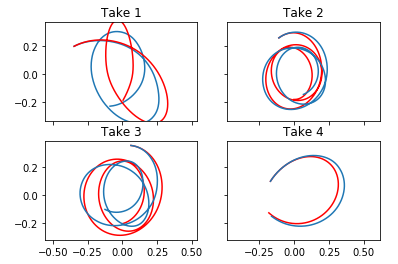

In [58]:
fes_me_els_grafics(1.4230, 0.2021, 1.1220, 0.0093)

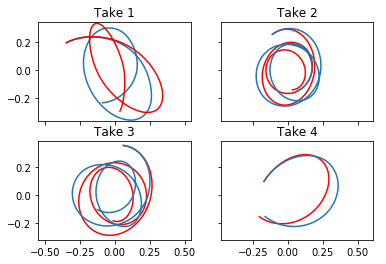

In [57]:
fes_me_els_grafics(c,k,sigma,mu)

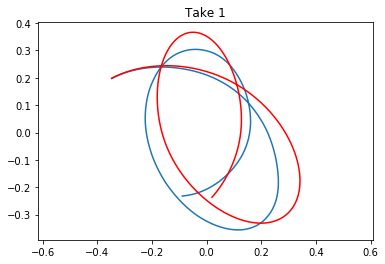

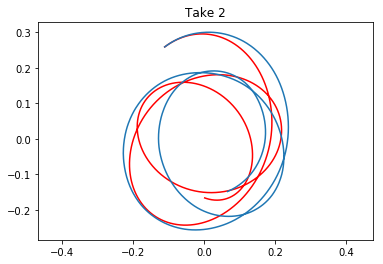

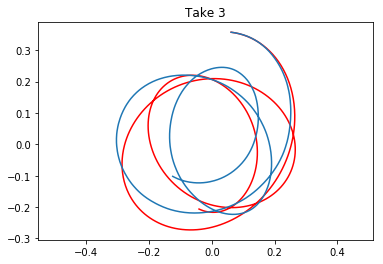

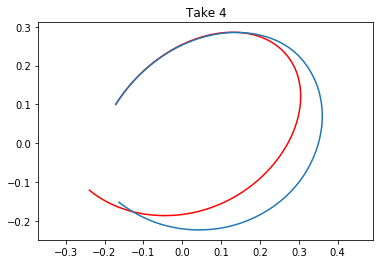

In [26]:
fes_me_els_grafics(c,k,sigma,mu)